In [2]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import csv
from collections import defaultdict, Counter
from matplotlib.pyplot import *
import matplotlib.colors
from matplotlib.animation import FuncAnimation

Number of transactions: 1948


<ipython-input-2-6d0c43730a59>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = axes()


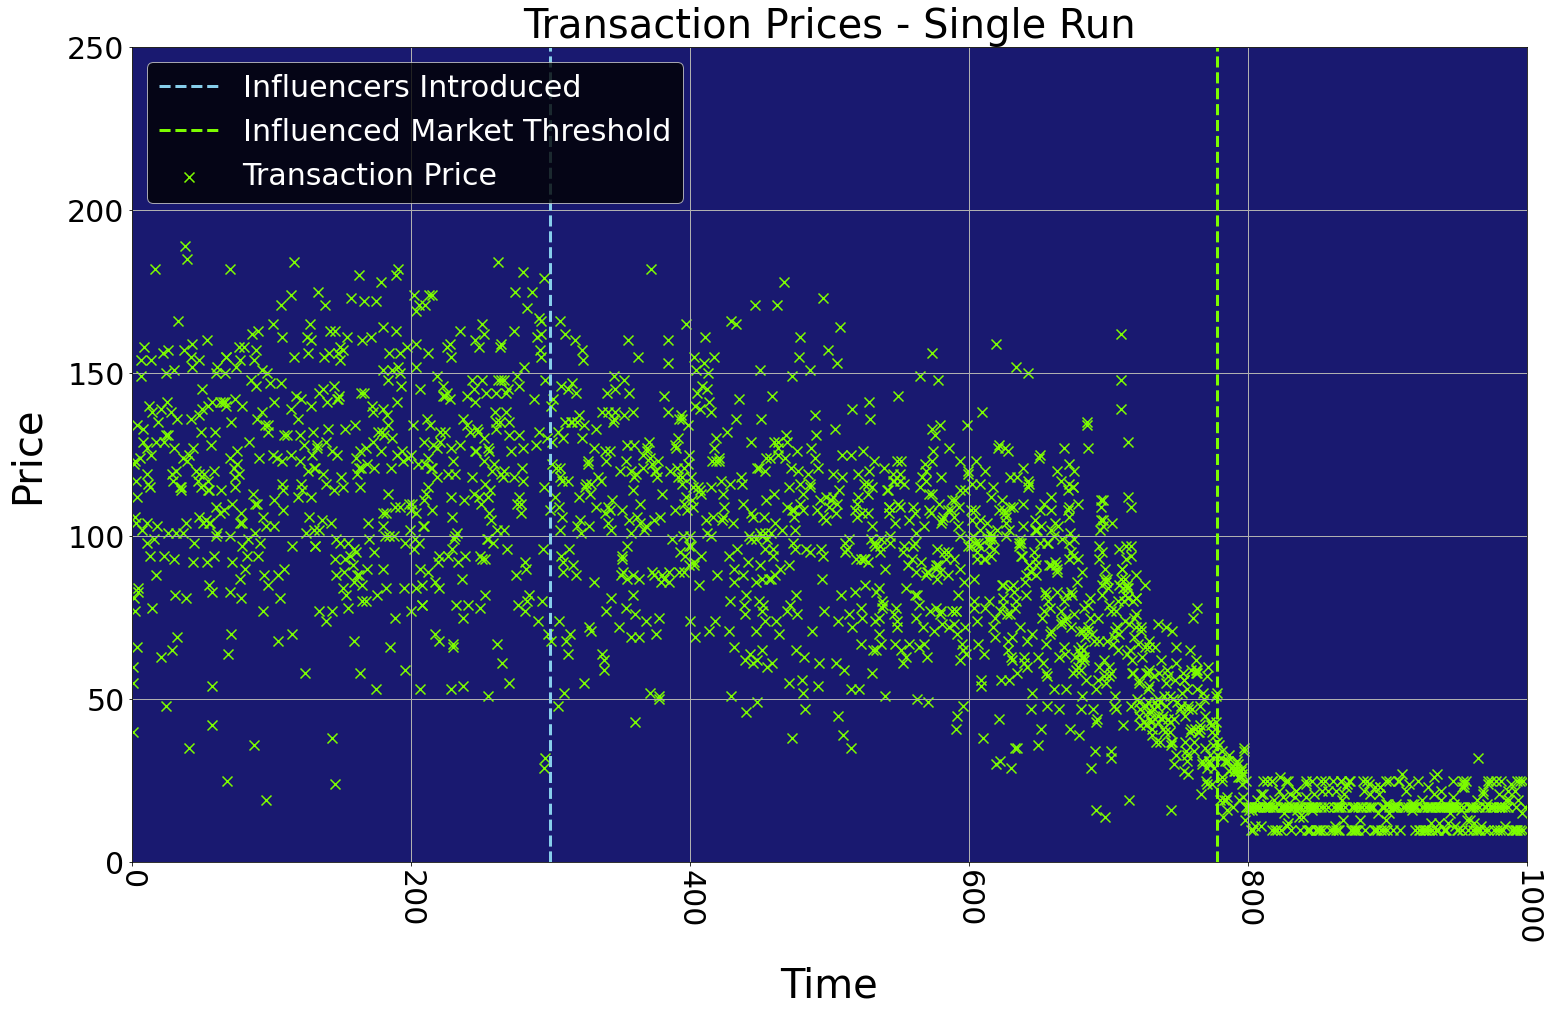

In [2]:
n_trials = 1
time_period = 225
transactions = []

# go through csv, add all data to transactions list

with open('Experiment2_trans_single.csv') as csv_file:
    readCSV = csv.reader(csv_file, delimiter=',')
    previous_time = 0
    trial_count = 0
    for row in readCSV:
        if float(row[0]) >= previous_time:
            transactions.append([((trial_count * time_period) + float(row[0])), float(row[1])])
        else:
            trial_count += 1
        previous_time = float(row[0])
        
        
# finding the maximum time on non_inf opinions list = the last recorded time before everyone has an opinion > 0.95
max_time = 0

with open('Experiment2_ops_single_noninf.csv') as csv_file:
    readCSV = csv.reader(csv_file, delimiter=',')
    for row in readCSV:
        if max_time < float(row[0]):
            max_time = float(row[0])


time = np.array(transactions)[:,0]
price = np.array(transactions)[:,1]

# figure parameters
print("Number of transactions:",len(price))
plt.figure(1, figsize=(25,15))
xlabel('Time', fontsize=40, labelpad=20)
ylabel('Price', fontsize=40, labelpad=20)
title("Transaction Prices - Single Run", fontsize=40)
label='Transaction Price'

# plot data 
p1 = scatter(time, price, marker='x', color='lawngreen', s=100, label=label)

label = "Influencers Introduced"
plt.axvline(x=300, color='skyblue', linestyle='--', label=label, lw=3)

label = "Influenced Market Threshold"
plt.axvline(x=max_time, color='lawngreen', linestyle='--', label=label, lw=3)

leg = plt.legend(loc='upper left', prop={'size': 30}, facecolor='black')

for text in leg.get_texts():
    text.set_color("white")

# more figure parameters
p1 = plot()
ax = axes()
ax.set_facecolor('midnightblue')
# ylim(ymin=min(price)-20, ymax=max(price)+20)
ylim(ymin=0, ymax=250)
xlim(xmin=0, xmax=1000)
yticks(fontsize=30)
xticks(fontsize=30, rotation=270)
grid(linestyle='-', linewidth=1)

plt.savefig('Graphs/e2_single_trans.png',dpi=200,bbox_inches='tight',pad_inches=0)
plt.savefig('Graphs/e2_single_trans.pdf',dpi=200,bbox_inches='tight',pad_inches=0)

show()

<ipython-input-5-f7d0165b2cc8>:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = axes()


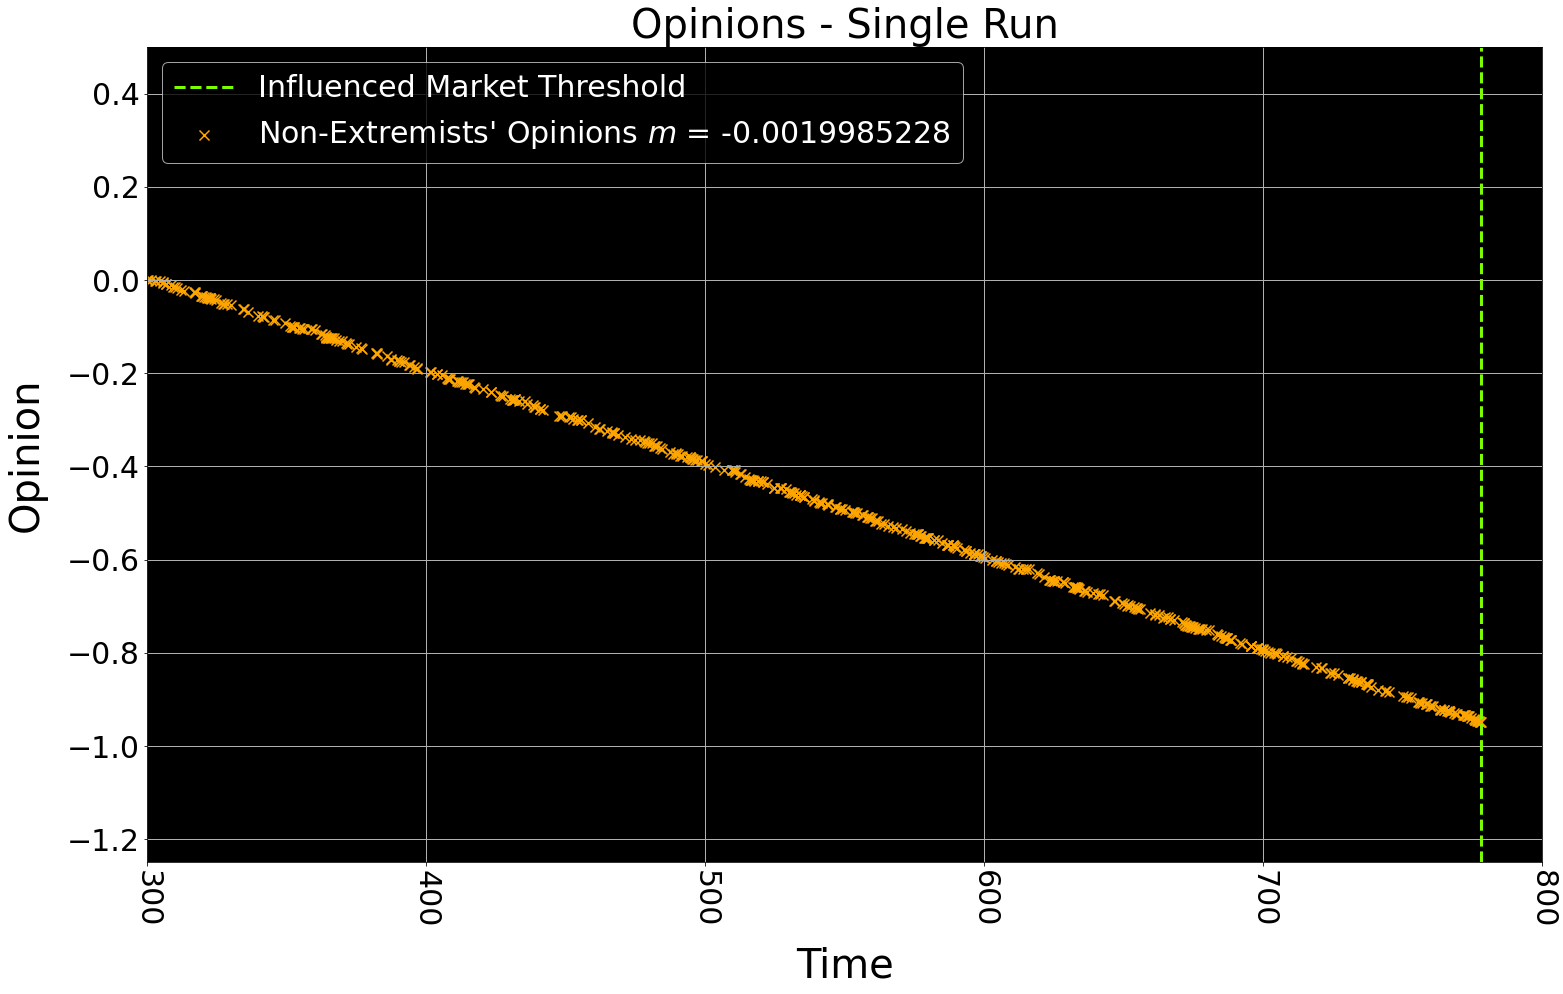

In [5]:
# figure parameters
plt.figure(1, figsize=(25,15))
xlabel('Time', fontsize=40, labelpad=20)
ylabel('Opinion', fontsize=40, labelpad=20)
title("Opinions - Single Run", fontsize=40)
label='Opinions'

n_trials = 1
time_period = 225
transactions = []

# go through csv, add all data to transactions list

with open('Experiment2_ops_single_noninf.csv') as csv_file:
    readCSV = csv.reader(csv_file, delimiter=',')
    previous_time = 0
    trial_count = 0
    for row in readCSV:
        if float(row[0]) >= previous_time:
            transactions.append([((trial_count * time_period) + float(row[0])), float(row[1])])
        else:
            trial_count += 1
        previous_time = float(row[0])

time = np.array(transactions)[:,0]
price = np.array(transactions)[:,1]

#p2 = plot(time, price, marker='x', color='green', s=100, label=label)

##################################################################################

# plot data 

slope, intercept = np.polyfit(time, price, 1)
slope = format(slope, ".10f")

label = "Non-Extremists' Opinions $\itm$ = {}".format(slope, ".3f")
p1 = scatter(time, price, marker='x', color='orange', s=100, label=label)

label = "Influenced Market Threshold"
plt.axvline(x=time[-1], color='lawngreen', linestyle='--', label=label, lw=3)

# plot equilib price line
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

leg = plt.legend(loc='upper left', prop={'size': 30}, facecolor='black')

for text in leg.get_texts():
    text.set_color("white")

# more figure parameters
p1 = plot()
ax = axes()
ax.set_facecolor('black')
# ylim(ymin=min(price)-20, ymax=max(price)+20)
ylim(ymin=-1.25, ymax=0.5)
xlim(xmin=300, xmax=800)
yticks(fontsize=30)
xticks(fontsize=30, rotation=270)
grid(linestyle='-', linewidth=1)

plt.savefig('Graphs/e2_single_ops.png',dpi=200,bbox_inches='tight',pad_inches=0)
plt.savefig('Graphs/e2_single_ops.pdf',dpi=200,bbox_inches='tight',pad_inches=0)

show()

In [4]:
def getAverageMaxTime(filename):
    
    prev_time = 0
    max_time_list = []
    data_lake = []
    
    with open(filename) as csv_file:
        readCSV = csv.reader(csv_file, delimiter=',')

        for row in readCSV:
            data_lake.append(row)
        
    for row in data_lake:
        
        if(float(row[0]) < prev_time):
            max_time_list.append(prev_time)
            prev_time = float(row[0])
            
        else:
            prev_time = float(row[0])
            
            
    max_time_list.append(float(row[0]))
    print(len(max_time_list))
    return np.mean(max_time_list)

Average Number of transactions: 8267.7


<ipython-input-9-e2b2da81384c>:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = axes()


200
Mean of the means is 83.88550401723133


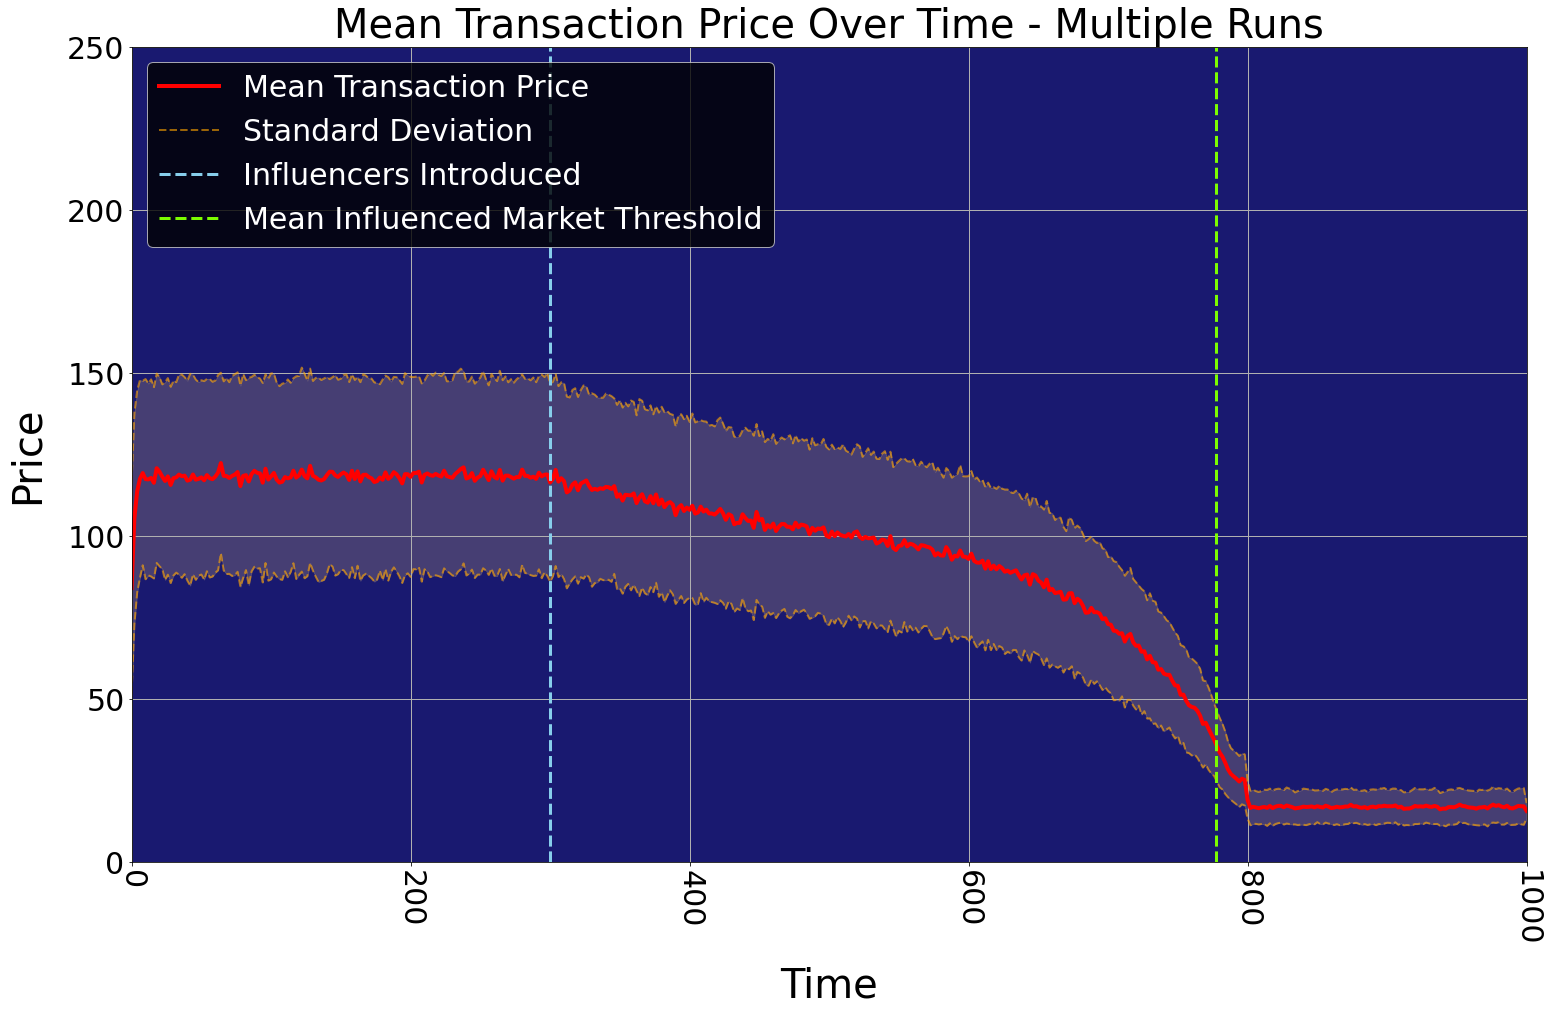

In [9]:
n_trials = 1
time_period = 225
transactions = []

# go through csv, add all data to transactions list

with open('Experiment2_trans_multiple.csv') as csv_file:
    readCSV = csv.reader(csv_file, delimiter=',')
    previous_time = 0
    trial_count = 0
    for row in readCSV:
        time = float(row[0]) % 1000
        price = float(row[1])
        transactions.append([time,price])

time = np.array(transactions)[:,0]
price = np.array(transactions)[:,1]




# Figure parameters
print("Average Number of transactions:",len(price) / 50)
plt.figure(1, figsize=(25,15))
xlabel('Time', fontsize=40, labelpad=20)
ylabel('Price', fontsize=40, labelpad=20)
title("Mean Transaction Price Over Time - Multiple Runs", fontsize=40)
label='Transaction Price'
p1 = plot()
ax = axes()
ax.set_facecolor('midnightblue')
# ylim(ymin=min(price)-20, ymax=max(price)+20)
ylim(ymin=0, ymax=250)
xlim(xmin=0, xmax=1000)
yticks(fontsize=30)
xticks(fontsize=30, rotation=270)
grid(linestyle='-', linewidth=1)

##############################################################################
# Mean line through data

# split list of continuous times into 500 bins
bins = 500
hist, bin_edges = np.histogram(time, bins=bins)

# new list for all data
modified_transactions = []


# since we need to elements of a list before and after the last bin, add a space here...
modified_transactions.append({'time': None, 'prices': []})
# ..then add space for all indexes within the first and last bin..
for i in bin_edges:
    modified_transactions.append({'time': i, 'prices': []})
# ...then add a space for time that falls outside of last bin
modified_transactions.append({'time': None, 'prices': []})

# go through original transactions list
for i in transactions:
    
    time = i[0]
    price = i[1]
    # this finds the index of the modified_transactions that this particular time value falls into 
    # i.e., if time is 20.22, and element 4 of the mod_trans list has bin edges either side of 20.2 and 20.3, then 
    # this time value belongs in element 4 of mod_trans list
    index = np.digitize(time, bin_edges)
    # once figured out where this time corresponds to in mod_trans list, add the price that corresponds to this time 
    # value to the price list in mod_trans list
    modified_transactions[index]['prices'].append(price)                          
        
mean_list = []
time_list = []
# contains data for plotting mean + std_deviataion
std_dev_pos_list = []
# contains data for plotting mean - std_deviataion
std_dev_neg_list = []
        
# loop through new mod_trans list
for i in modified_transactions:
    
    # if data, add it
    if(i['time'] is not None):
        if(len(i['prices'])>0):
            time_list.append(i['time'])
            mean = np.mean(i['prices'])
            std_dev = np.std(i['prices'])

            # calculate mean, mean+std_dev, mean-std_dev, and add to the respective lists, which we will plot
            mean_list.append(mean)
            std_dev_pos_list.append(mean+std_dev)
            std_dev_neg_list.append(mean-std_dev)

            
# finding the maximum time on non_inf opinions list = the last recorded time before everyone has an opinion > 0.95
max_time = getAverageMaxTime('Experiment2_ops_multiple_noninf.csv')    

# plotting everything now...
label = "Mean Transaction Price"
p1 = plot(time_list, mean_list, color='red', lw=4.0, label=label)

label = "Standard Deviation"
p2 = plot(time_list, std_dev_pos_list, '--', color='orange', lw=2.0, label=label, alpha=0.6)
p3 = plot(time_list, std_dev_neg_list, '--', color='orange', lw=2.0, alpha=0.6)

plt.fill_between(time_list, std_dev_pos_list, std_dev_neg_list, color='#FFD580', alpha=0.2)

label = "Influencers Introduced"
plt.axvline(x=300, color='skyblue', linestyle='--', label=label, lw=3)

label = "Mean Influenced Market Threshold"
plt.axvline(x=max_time, color='lawngreen', linestyle='--', label=label, lw=3)

leg = plt.legend(loc='upper left', prop={'size': 30}, facecolor='black')
for text in leg.get_texts():
    text.set_color("white")
    
    
print("Mean of the means is {}".format(np.mean(mean_list)))

plt.savefig('Graphs/e2_multiple_trans.png',dpi=200,bbox_inches='tight',pad_inches=0)
plt.savefig('Graphs/e2_multiple_trans.pdf',dpi=200,bbox_inches='tight',pad_inches=0)
    
show()

<ipython-input-11-381c68c2f0e8>:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = axes()


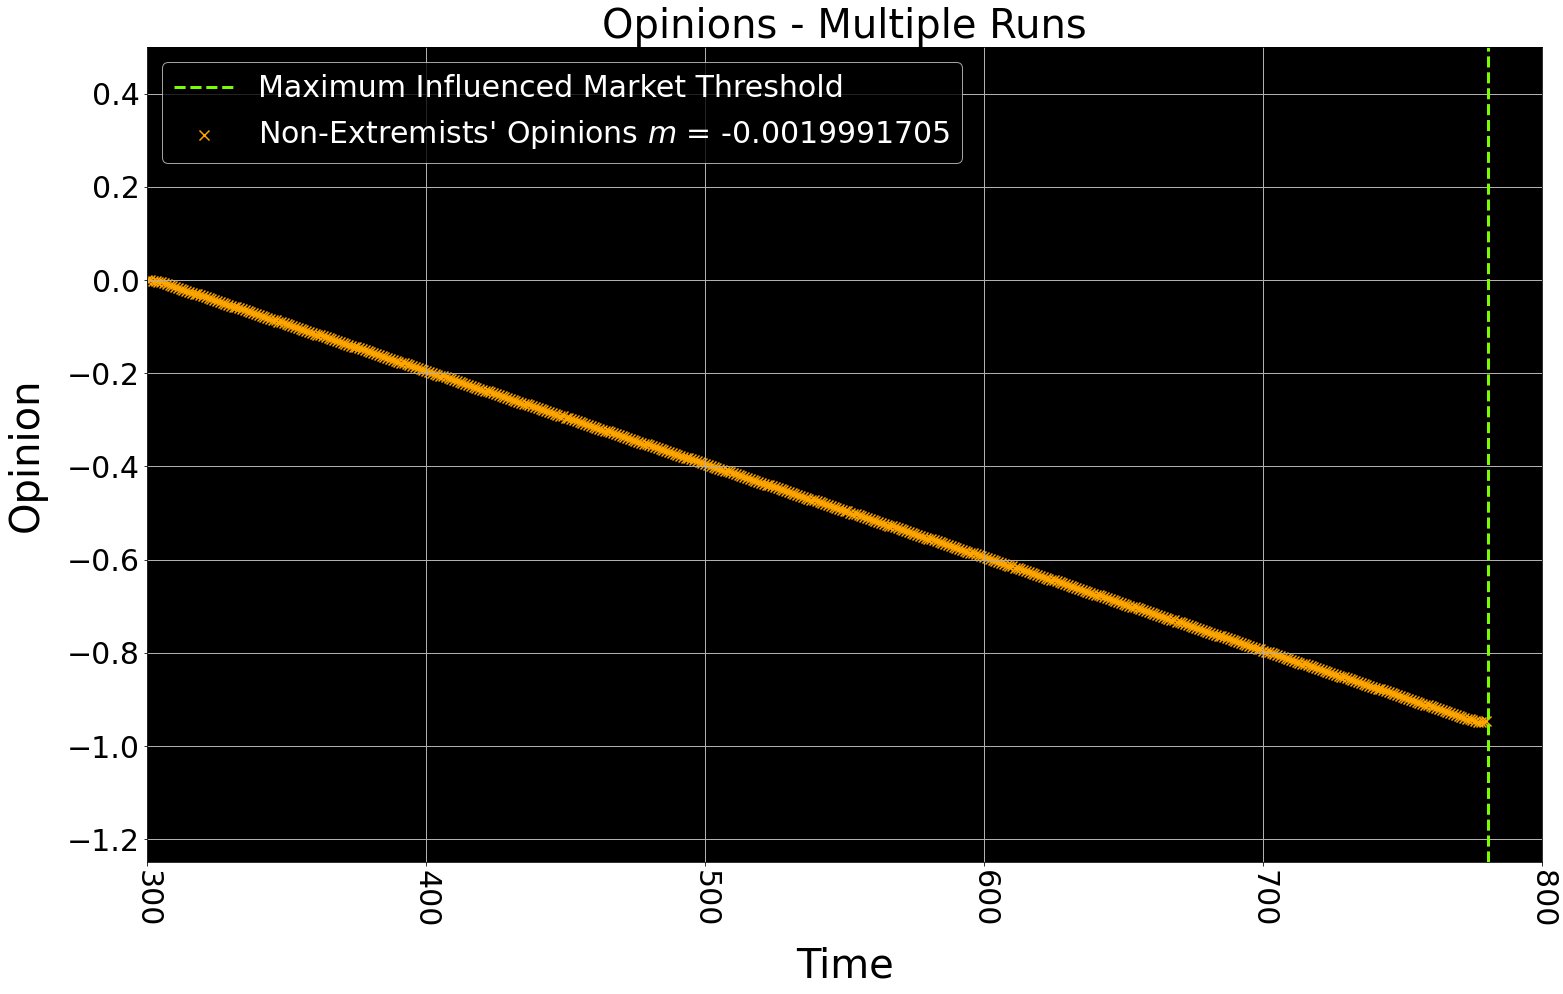

In [11]:
# step = []
opinions = []
cs = []

# a list of prices go in each time level
mean_op_data = []

# get max time
max_time = 0

with open('Experiment2_ops_multiple_noninf.csv') as csv_file:
    readCSV = csv.reader(csv_file, delimiter=',')
    for row in readCSV:
        if(float(row[0]) > max_time):
            max_time = float(row[0])


for i in range(300, int(max_time) + 1):
    mean_op_data.append([i,[]])
        
# go through csv, add all data to transactions list

with open('Experiment2_ops_multiple_noninf.csv') as csv_file:
    readCSV = csv.reader(csv_file, delimiter=',')
    trial_count = 0
    time_period = 225
    for row in readCSV:
        ntime=float(row[0])
        
        if(row[1][0] == ' '):
            row[1] = row[1][1:]
        
        opinion = float(row[1])
        index = int(ntime) - 300
        mean_op_data[index][1].append(opinion)

for i in mean_op_data:
    
    i[1] = np.mean(i[1])
    

time = np.array(mean_op_data)[:,0]
price = np.array(mean_op_data)[:,1]

# figure parameters
plt.figure(1, figsize=(25,15))
xlabel('Time', fontsize=40, labelpad=20)
ylabel('Opinion', fontsize=40, labelpad=20)
title("Opinions - Multiple Runs", fontsize=40)
label='Opinions'

slope, intercept = np.polyfit(time, price, 1)
slope = format(slope, ".10f")

label = "Non-Extremists' Opinions $\itm$ = {}".format(slope, ".3f")
p1 = scatter(time, price, marker='x', color='orange', s=100, label=label)

label = "Maximum Influenced Market Threshold"
plt.axvline(x=max_time, color='lawngreen', linestyle='--', label=label, lw=3)

# plot equilib price line
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

leg = plt.legend(loc='upper left', prop={'size': 30}, facecolor='black')

for text in leg.get_texts():
    text.set_color("white")

# more figure parameters
p1 = plot()
ax = axes()
ax.set_facecolor('black')
# ylim(ymin=min(price)-20, ymax=max(price)+20)
ylim(ymin=-1.25, ymax=0.5)
xlim(xmin=300, xmax=800)
yticks(fontsize=30)
xticks(fontsize=30, rotation=270)
grid(linestyle='-', linewidth=1)

plt.savefig('Graphs/e2_multiple_ops.png',dpi=200,bbox_inches='tight',pad_inches=0)
plt.savefig('Graphs/e2_multiple_ops.pdf',dpi=200,bbox_inches='tight',pad_inches=0)


show()